# Climb Dataset
<a href = https://www.kaggle.com/datasets/jordizar/climb-dataset> Original Link </a>

## Objectives
We intend to train a linear regression model with this dataset to predict the maximum grade achieved by different climbers based on variables provided such as height, weight, age, years climbed and country.

## Table of Contents
* [Importing Dataset](#importing-dataset)
* [Exploratory Analysis & Data Cleaning](#exploratory-analysis-and-data-cleaning)

In [1]:
#Import libs

import numpy as np
import pandas as pd
import seaborn as sb
import sys
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objects as go
import plotly.express as px

In [2]:
%%script false --no-raise-error

# Cell for Colaboratory init
from google.colab import files
uploaded = files.upload()

## Importing Dataset <a class="anchor" id="importing-dataset"></a>
First, we import the necessary files

**climber_df.csv** - Raw data of the climbers  
**grades_conversion_table.csv** - Lookup table for climbing grades

In [3]:
# Import data
dataset_raw = pd.read_csv("climber_df.csv")
grades_raw = pd.read_csv("grades_conversion_table.csv")

# Create clean dataset, and track the cleaning status
dataset_cleaned = dataset_raw.copy()
status = set()

# Display basic info
display(dataset_raw)
display(grades_raw)

dataset_raw.info()
grades_raw.info()

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,66987,ESP,0,194,83,33.0,5,2015-05-01 22:00:00,2017-09-03 22:00:00,27,35,44,49,39.666667,2015,2017
10923,66988,USA,0,183,78,22.0,1,2017-09-03 22:00:00,2017-09-06 22:00:00,2,33,28,33,30.500000,2017,2017
10924,67009,other,0,165,63,41.0,20,2017-09-09 22:00:00,2003-06-19 22:00:00,35,53,46,59,45.800000,2017,2003
10925,67019,NOR,0,172,73,26.0,4,2017-06-14 22:00:00,2017-08-11 22:00:00,7,44,46,46,42.714286,2017,2017


,Unnamed: 0,grade_id,grade_fra
0,0,0,-
1,1,1,-
2,2,2,-
3,3,3,1
4,4,4,1a
...,...,...,...
80,80,80,9b+/9c
81,81,81,9c
82,82,82,9c/+
83,83,83,9c+


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10927 entries, 0 to 10926
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10927 non-null  int64  
 1   country       10927 non-null  object 
 2   sex           10927 non-null  int64  
 3   height        10927 non-null  int64  
 4   weight        10927 non-null  int64  
 5   age           10927 non-null  float64
 6   years_cl      10927 non-null  int64  
 7   date_first    10927 non-null  object 
 8   date_last     10927 non-null  object 
 9   grades_count  10927 non-null  int64  
 10  grades_first  10927 non-null  int64  
 11  grades_last   10927 non-null  int64  
 12  grades_max    10927 non-null  int64  
 13  grades_mean   10927 non-null  float64
 14  year_first    10927 non-null  int64  
 15  year_last     10927 non-null  int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 e

# Exploratory Analysis & Data Cleaning<a class="anchor" id="exploratory-analysis-and-data-cleaning"></a>
In this section, we analyse and clean the following variables:
* [Country](#country)
* [Height and Weight](#height-weight)
* [Years Climbed](#years-climbed)
* 

Lastly, we create a correlation heatmap to summarise our changes after data cleaning, and identify variables to train our model with.

## Country<a class="anchor" id="country"></a>
First, we observe that:
1. Data for this column is categorical and is stored as unordered 3-character strings (eg. ESP, POL)
2. Most data is collected from Europe
3. There is a substantial difference between countries in median, upper and lower quartiles which could be useful

We then conclude that the following steps should be taken
1. Countries should be encoded by integers
2. Their mappings should be ordered based on some indicator (mean, upper quartile, lower quartile, median)

We perform this mapping with different indicators, and select **mean** as the most representative indicator due to its highest correlation.

Number of Countries : 26


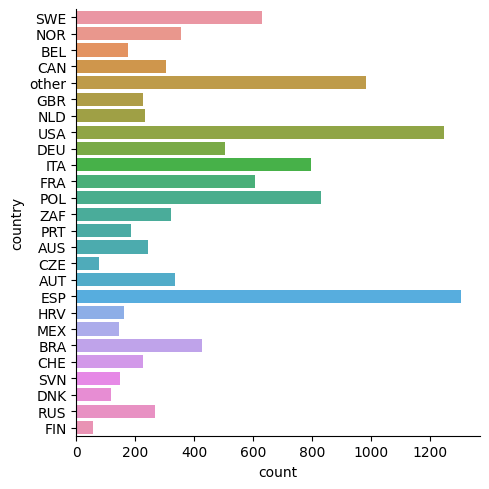

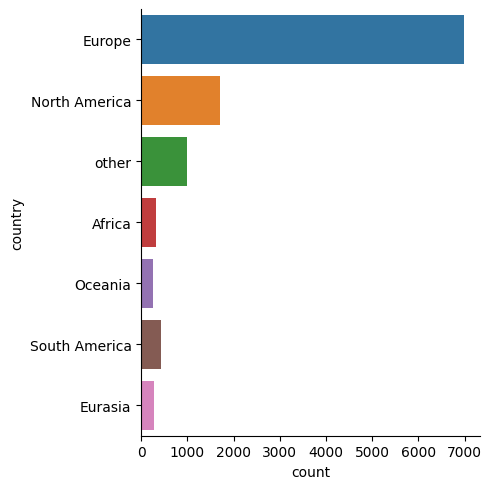

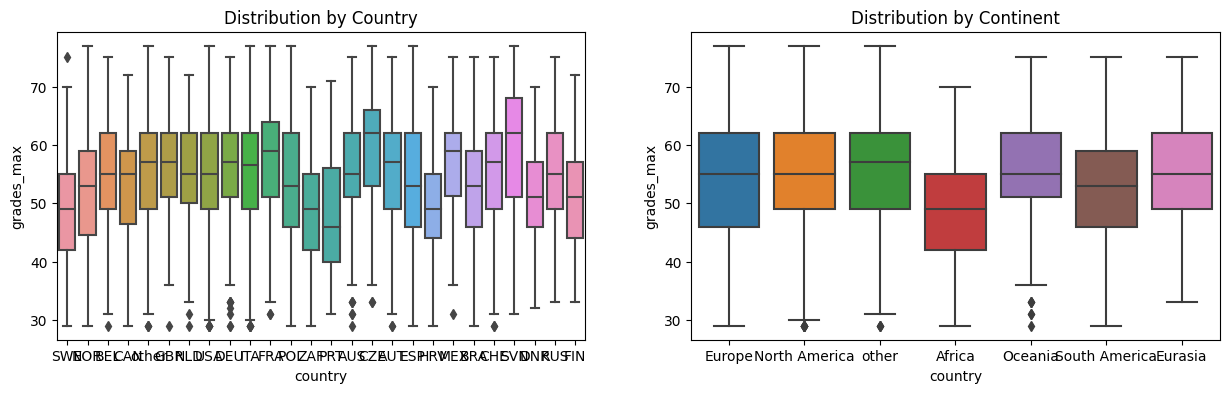

In [4]:
# Data Visualisation and Observations

# Countries in the Dataset
print("Number of Countries :", len(dataset_raw["country"].unique()))

# Grouping countries into continents
climbers_continent = dataset_raw.copy()
climbers_continent.loc[dataset_raw["country"].isin(['ESP','POL','ITA','SWE','FRA','DEU','NOR','AUT','NLD','GBR','CHE','PRT', 'BEL', 'HRV', 'SVN', 'DNK', 'CZE', 'FIN']) == True, "country"] = "Europe"
climbers_continent.loc[dataset_raw["country"].isin(['USA', 'CAN', 'MEX']) == True, "country"] = "North America"
climbers_continent.loc[dataset_raw["country"].isin(['BRA']) == True, "country"] = "South America"
climbers_continent.loc[dataset_raw["country"].isin(['ZAF']) == True, "country"] = "Africa"
climbers_continent.loc[dataset_raw["country"].isin(['AUS']) == True, "country"] = "Oceania"
climbers_continent.loc[dataset_raw["country"].isin(['RUS']) == True, "country"] = "Eurasia"

climbers_continent.country.value_counts()
# Climbers in each Continent
sb.catplot(y = "country", data = dataset_raw, kind = "count");
sb.catplot(y = "country", data = climbers_continent, kind = "count");

# Compare distributions by country

fig, axis = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(15)
axis[0].set_title("Distribution by Country")
sb.boxplot(x = 'country', y = 'grades_max', data = dataset_raw, ax=axis[0]);
axis[1].set_title("Distribution by Continent")
sb.boxplot(x = 'country', y = 'grades_max', data = climbers_continent, ax=axis[1]);

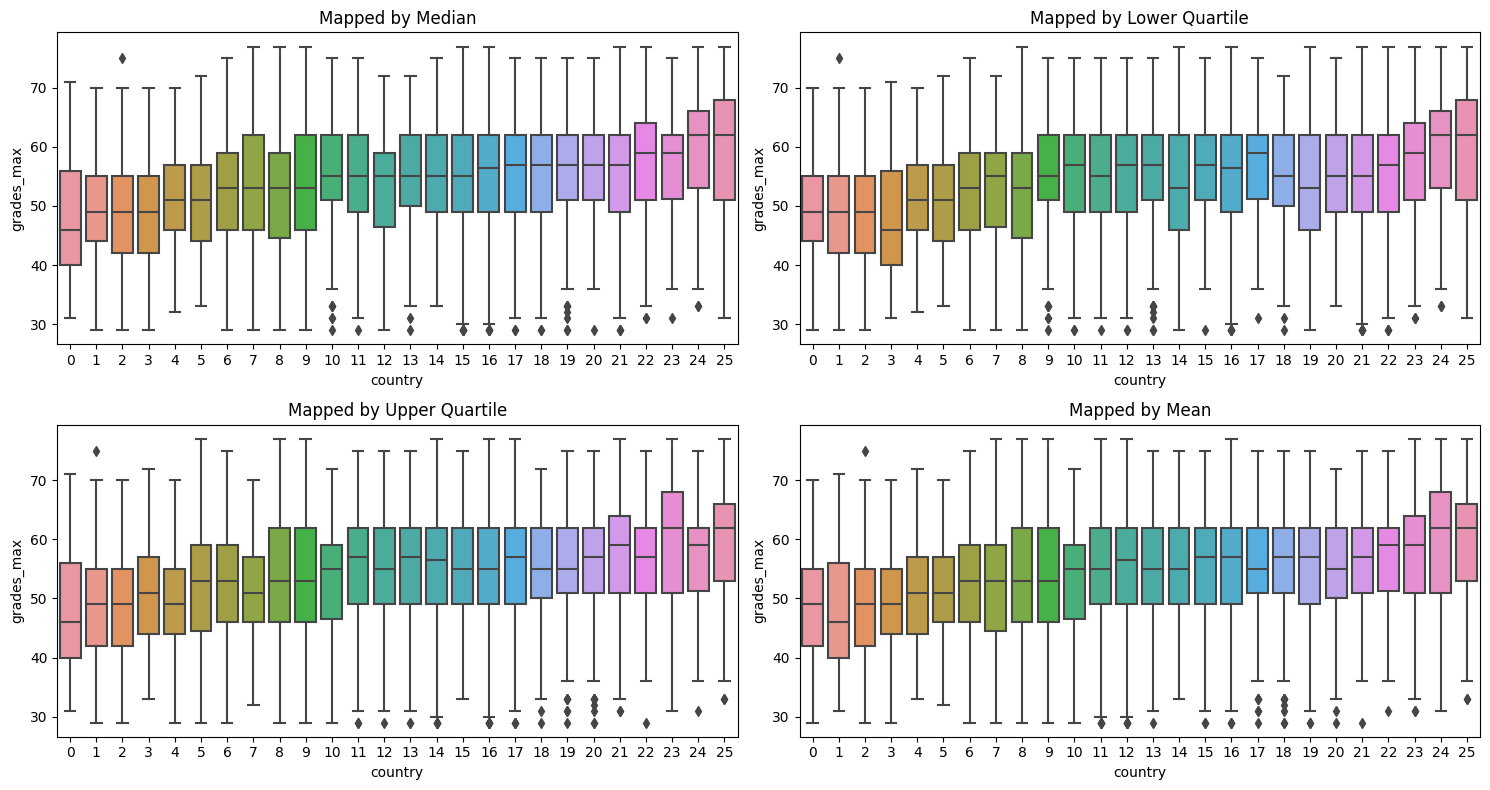

,median_map,lower_map,upper_map,mean_map,grades_max
median_map,1.000000,0.760249,0.919525,0.907316,0.207159
lower_map,0.760249,1.000000,0.762944,0.667307,0.179688
upper_map,0.919525,0.762944,1.000000,0.922788,0.210703
mean_map,0.907316,0.667307,0.922788,1.000000,0.218452
grades_max,0.207159,0.179688,0.210703,0.218452,1.000000


Chosen Mapping: MEAN

 {'ZAF': 0, 'PRT': 1, 'SWE': 2, 'HRV': 3, 'FIN': 4, 'DNK': 5, 'BRA': 6, 'NOR': 7, 'ESP': 8, 'POL': 9, 'CAN': 10, 'USA': 11, 'ITA': 12, 'BEL': 13, 'RUS': 14, 'CHE': 15, 'other': 16, 'AUS': 17, 'DEU': 18, 'AUT': 19, 'NLD': 20, 'GBR': 21, 'MEX': 22, 'FRA': 23, 'SVN': 24, 'CZE': 25}

Remapped country column by mean


In [5]:
# Mapping country encoding based on different indicators

# Helper function, remaps countries based on the provided indicator
def rank_countries(func):
    order = []
    for x in dataset_raw["country"].unique():
        order.append([func(x), x])
    order.sort()
    mapping = {a[1]:b for b, a in enumerate(order)}

    # Remap country values (if not already mapped)
    remapped = pd.DataFrame(dataset_raw["grades_max"])
    remapped["country"] = dataset_raw["country"].map(mapping)
    return mapping, remapped

med_map, countries_med = rank_countries(lambda x: dataset_raw[dataset_raw["country"]==x]["grades_max"].median())
hi_map, countries_hi = rank_countries(lambda x: dataset_raw[dataset_raw["country"]==x]["grades_max"].quantile(0.25))
lo_map, countries_lo = rank_countries(lambda x: dataset_raw[dataset_raw["country"]==x]["grades_max"].quantile(0.75))
mean_map, countries_mean = rank_countries(lambda x: dataset_raw[dataset_raw["country"]==x]["grades_max"].mean())

# Display results
fig, axis = plt.subplots(2, 2)
fig.set_figheight(8)
fig.set_figwidth(15)
axis[0,0].set_title("Mapped by Median")
sb.boxplot(x = 'country', y = 'grades_max', data = countries_med, ax = axis[0,0]);
axis[0,1].set_title("Mapped by Lower Quartile")
sb.boxplot(x = 'country', y = 'grades_max', data = countries_lo, ax = axis[0,1]);
axis[1,0].set_title("Mapped by Upper Quartile")
sb.boxplot(x = 'country', y = 'grades_max', data = countries_hi, ax = axis[1,0]);
axis[1,1].set_title("Mapped by Mean")
sb.boxplot(x = 'country', y = 'grades_max', data = countries_mean, ax = axis[1,1]);

fig.tight_layout()
plt.show()

# Compare correlation and choose a mapping to use
country_corr = pd.DataFrame({
                "median_map": countries_med["country"],
                "lower_map": countries_lo["country"],
                "upper_map": countries_hi["country"],
                "mean_map": countries_mean["country"],
                "grades_max": dataset_raw["grades_max"],
                })
display(country_corr.corr())
plt.show()
print("Chosen Mapping: MEAN\n\n", mean_map)
if not "country" in status:
    dataset_cleaned["country"] = countries_mean["country"]
    status.add("country")

print("\nRemapped country column by mean")

## Height and Weight<a class="anchor" id="height-weight"></a>
First, we observe that:
1. Data is scalar and stored as integers for both variables
2. Running a correlation heatmap gives us relatively low correlation to both variables

To make these variables more relevant, we can use their values to calculate BMI using the formula:

$BMI = \frac{weight/kg}{[height/m]^2}$

> Note that this formula is **not** a linear combination of the two variables and is hence a useful operation to perform on the variables.

Calculating correlation of BMI with `grades_max`, we see that the correlation has improved from the original height and weight correlation, suggesting that BMI will be a more useful predictor than the raw values of height and weight from the original dataset.

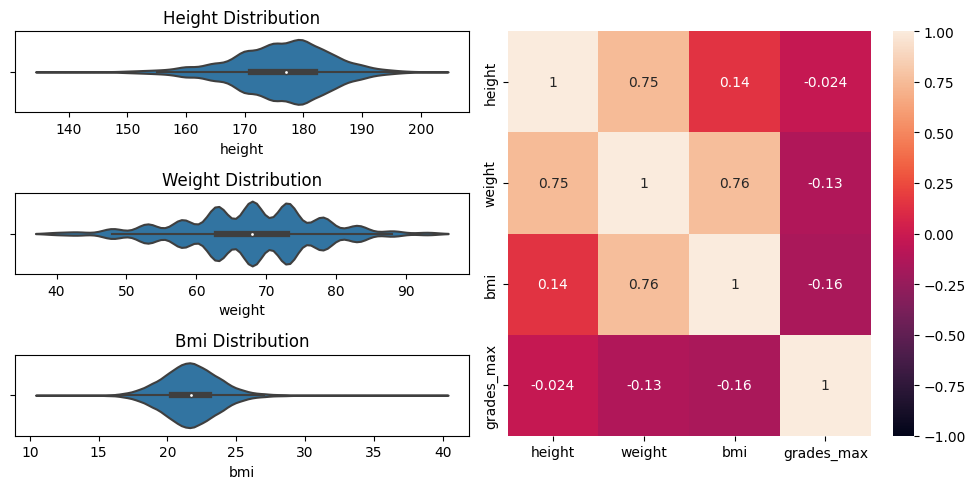

CONCLUSION: Added bmi, dropped height/weight


In [6]:
fig, axis = plt.subplots(3, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
axis[0,0].set_title("Height Distribution")
sb.violinplot(x = 'height', data = dataset_raw, ax = axis[0,0]);
axis[1,0].set_title("Weight Distribution")
sb.violinplot(x = 'weight', data = dataset_raw, ax = axis[1,0]);


gs = axis[0, 1].get_gridspec()
for ax in axis[0:, -1]: ax.remove()
axbig = fig.add_subplot(gs[0:, -1])

# Calculate bmi and perform correlation
bmi = pd.DataFrame({
    "height": dataset_raw["height"],
    "weight": dataset_raw["weight"],
    "bmi": dataset_raw["weight"]/dataset_raw["height"]/dataset_raw["height"]*10000,
    "grades_max": dataset_raw["grades_max"]
})

axis[2,0].set_title("Bmi Distribution")
sb.violinplot(x = 'bmi', data = bmi, ax = axis[2,0]);

sb.heatmap(bmi.corr(),vmin = -1,vmax = 1, annot=True, ax=axbig)

fig.tight_layout()
plt.show()


# Add bmi to dataset_cleaned and drop height/weight 
dataset_cleaned["bmi"] = bmi["bmi"]
if not "height_weight" in status:
    dataset_cleaned = dataset_cleaned.drop(columns=["height", "weight"])
    status.add("height_weight")
print("CONCLUSION: Added bmi, dropped height/weight")

## Years Climbed<a class="anchor" id="years-climbed"></a>
The dataset provides us with `years_cl`, described by the dataset author as the number of "years climbing". However, this information is insufficient:
1. "Years climbing" may refer to the number of years spent climbing regulary, or the number of years since the first climb (The climber may no longer be active)
2. We convert `years_cl` to `days_cl` with the approximation: $days\_climbed = years\_climbed*365$
3. Taking the difference between `date_first` and `date_last` (We name this variable `days_diff`) gives another measure of days spent climbing which has a vastly different distribution from `years_cl`: These variables appear mutually exclusive, but it is unclear which variable might be more useful as a predictor.

To identify which variable we want to use, we perform the following steps:
1. Compare each variables' correlation to `grade_max`
2. Obtaining the frequency that the climber did climbs while he was active using the formula:  
   $frequency=\frac{grades\_count}{number\_of\_days}$

> Note that this formula is **not** a linear combination of the two variables and is hence a useful operation to perform on the variables.

We observe that
* `days_diff` has a far stronger correlation to `grades_max` than `days_cl`
* Both versions of frequency have a lower correlation to `grades_max` than their original variables, hence frequency is not a useful predictor for `grades_max`

As previously mentioned, `days_diff` and `days_cl` are mutually exclusive variables. Hence, we should discard `years_cl` and replace it with `days_diff`. `date_first` and `date_last` can additionally be dropped from the dataset.

,grades_count,years_cl,days_cl,days_diff,freq_cl,freq_diff,grades_max
0,84,21,7665,905,91.250000,10.773810,62
1,12,22,8030,476,669.166667,39.666667,59
2,119,16,5840,1791,49.075630,15.050420,64
3,298,25,9125,6347,30.620805,21.298658,63
4,5,21,7665,4457,1533.000000,891.400000,53
...,...,...,...,...,...,...,...
10922,27,5,1825,856,67.592593,31.703704,49
10923,2,1,365,3,182.500000,1.500000,33
10924,35,20,7300,5196,208.571429,148.457143,59
10925,7,4,1460,58,208.571429,8.285714,46


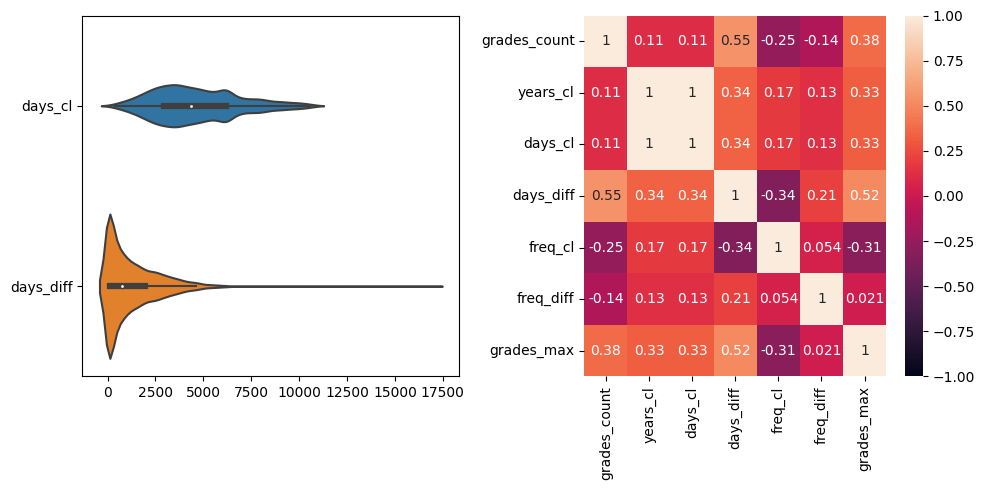

CONCLUSION: days_diff added, [years_cl, date_first, date_last] dropped.


In [7]:
from datetime import datetime

fmt = "%Y-%m-%d %H:%M:%S"
duration = pd.DataFrame({
    "grades_count": dataset_raw["grades_count"],
    "years_cl": dataset_raw["years_cl"],
    "days_cl": dataset_raw["years_cl"]*365,
    "days_diff": [abs((datetime.strptime(dataset_raw["date_last"][i], fmt)
                  - datetime.strptime(dataset_raw["date_first"][i], fmt)).days) for i in range(len(dataset_raw))],
})

duration["freq_cl"] = duration["days_cl"]/dataset_raw["grades_count"]
duration["freq_diff"] = duration["days_diff"]/dataset_raw["grades_count"]
duration["grades_max"] = dataset_raw["grades_max"]

display(duration)

fig, axis = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
sb.violinplot(data = duration[["days_cl", "days_diff"]], orient='h', ax = axis[0]);
sb.heatmap(duration.corr(),vmin = -1,vmax = 1, annot=True)

fig.tight_layout()
plt.show()

dataset_cleaned["days_diff"] = duration["days_diff"]
if not "duration" in status:
    dataset_cleaned = dataset_cleaned.drop(columns=["years_cl", "date_first", "date_last"])
    status.add("duration")

print("CONCLUSION: days_diff added, [years_cl, date_first, date_last] dropped.")

<Axes: >

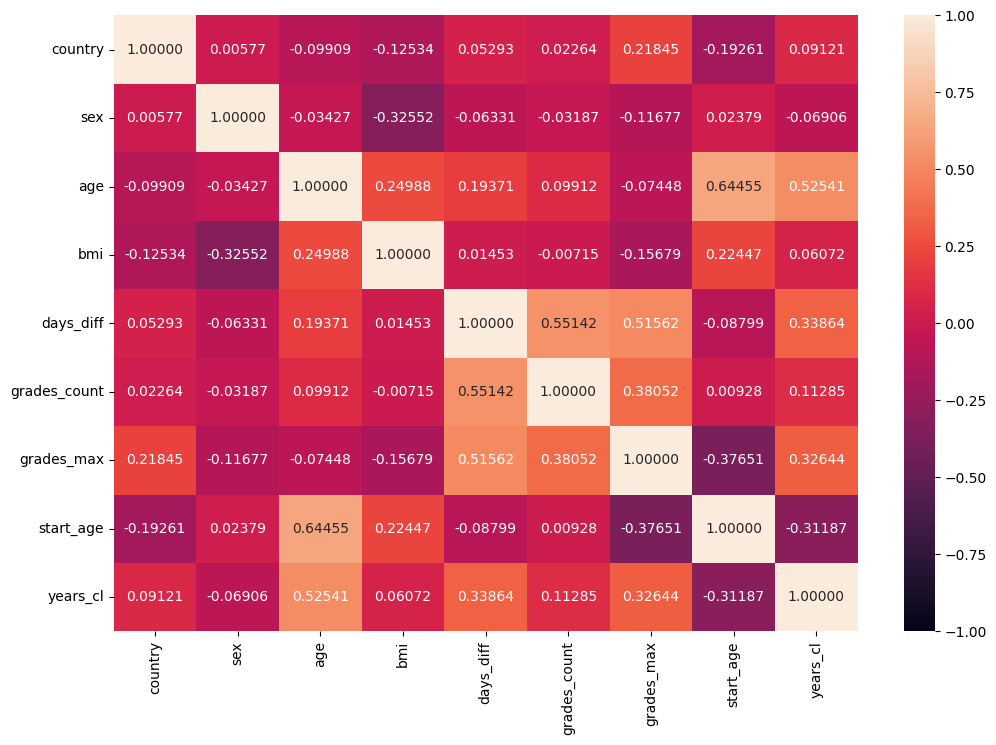

In [12]:
dataset_corr = pd.DataFrame(dataset_cleaned[["country", "sex", "age","bmi", "days_diff", "grades_count", "grades_max"]])
dataset_corr["years_cl"] = dataset_raw["years_cl"]
f,axes = plt.subplots(1,1, figsize = (12,8))
sb.heatmap(dataset_corr.corr(),vmin = -1,vmax = 1,annot = True, fmt=".5f")